<br>

<center>
    <span style="font-size:24px; font-weight:bold;">Insurance Charges Prediction - EDA + ML Regression + MLflow</span>
</center>

<br>

<hr style="border: none; border-top: 1px solid #000;">

<center>
    <span>
        Created by <b>Ian Yap</b>
        &emsp;|&emsp;
        Data from <a href="https://www.kaggle.com/datasets/mirichoi0218/insurance"><b>Kaggle</b></a>
        &nbsp;
    </span>
</center>

<br>

<center>
    <span>
        <a href="https://www.linkedin.com/in/ian-yap-052870139/"><b>LinkedIn</b></a>
        &emsp;|&emsp;
        <a href="https://xiyap.github.io/"><b>Portfolio</b></a>
    </span>
</center>
    
<hr style="border: none; border-top: 1px solid #000;">


<span style="font-size:22px; font-weight:bold;">Table of Contents</span>

1. [Background](#Background)
2. [Objectives](#Objectives)
3. [Feature Information](#Feature_Information)
4. [Import Libraries](#Import_Libraries)
5. [Data Loading](#Data_Loading)
6. [Feature Engineering](#Feature_Engineering)
7. [Exploratory Data Analysis (EDA) & Visualization](#Exploratory_Data_Analysis_(EDA)_&_Visualization)
    - [Feature Data Analysis](#Feature_Data_Analysis)
    - [Feature Relationship Analysis](#Feature_Relationship_Analysis)
    - [Data Correlation](#Data_Correlation)
8. [Data Preparation](#Data_Preparation)
9. [Model Development](#Model_Development)
    - [Linear Regression (lr)](#Linear_Regression)
    - [Support Vector Regression with GridSearch (grid_svr)](#Support_Vector_Regression_with_GridSearch_(grid_svr))
    - [Random Forest Regression with GridSearch (grid_rfr)](#Random_Forest_Regression_with_GridSearch_(grid_rfr))
    - [Extreme Gradient Boost with GridSearch (grid_xgb)](#Extreme_Gradient_Boost_with_GridSearch_(grid_xgb))
10. [Model Comparison](#Model_Comparison)
11. [Conclusion](#Conclusion)
12. [Recommendation](#Recommendation)
13. [Final Model Deployment](#Final_Model_Deployment)
14. [Neural Network Approach](#Neural_Network_Approach)

## <a id='Background' href=#1> Background </a>

In the health insurance industry, one of the common challenge faced by insurance companies are to determine an accurate premium for each policyholder. This difficulty is due to the many types of health complications that a human might face during their lifetime and the large variety of treatment costs that could be dealt with. An oversight in assessing the health risks of an individual could result in financial losses. Therefore, an accurate prediction on the medical costs a policyholder might face is required to ensure insurance companies can make a profit, while policyholders are provided with a fair policy.

In this project, a dataset containing information about the health insurance policyholders age, sex, body mass index (BMI), number of children or dependents covered, smoking habits, residing region and total medical costs billed by health insurance will be used. Based on this dataset, a predictive model will be developed to assist health insurance agents to accurately predict the potential medical costs of a potential policyholder to determine a proper insurance premium.

Besides potential medical costs prediction, the data obtained from the model can also be used by insurance companies to develop and update new and existing product portfolios that are more aligned for the everchanging world. As the costs of treatments are constantly changing due to inflation and world events, an updated product portfolio which has more value will aid in capturing the attention of potential policyholders, thus increasing a companies profit.

## <a id='Objectives' href=#1> Objectives </a>

The *main* objective of this project is to **develop a predictive model which can predict the potential medical costs of a prospective policyholder.**

The *secondary* objectives of this project are:
1. To identify the **determining factor which impacts an individuals medical costs.**
2. To assist insurance agents in **determining the suitable health insurance plan and premium** for a customer based on their health features.
3. To aid insurance companies in **developing and updating product portfolios** which better aligns with current time.

## <a id='Feature_Information' href=#1> Feature Information </a>

- **age**: Age of policyholder
- **sex**: Gender of policyholder
- **bmi**: Body mass index (BMI) of policyholder
- **children**: Number of children/dependents covered by health insurance
- **smoker**: Is the policyholder a smoker? (Yes/No)
- **region**: Region in US where the policyholder resides
- **charges**: Individual medical costs billed by health insurance

## <a id='Import_Libraries' href=#1> Import Libraries </a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
mlflow.set_tracking_uri('http://127.0.0.1:5000')
mlflow.set_experiment('insurance_charge_prediction')

2024/03/11 12:11:35 INFO mlflow.tracking.fluent: Experiment with name 'insurance_charge_prediction' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/433382860941836878', creation_time=1710130295805, experiment_id='433382860941836878', last_update_time=1710130295805, lifecycle_stage='active', name='insurance_charge_prediction', tags={}>

## <a id='Data_Loading' href=#1> Data Loading </a>

Loading the data to be used for analysis and model development.

In [3]:
df_ori = pd.read_csv('insurance.csv')

In [4]:
df = df_ori.copy()

In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## <a id='Feature_Engineering' href=#1> Feature Engineering </a>

Before using the data, we will perform data wrangling to clean the data so that it is suitable for the predictive model.

We first check for any duplicated data and remove them as it will affect the data analysis and training of the predictive model.

In [7]:
print(f'Number of duplicated rows: {df.duplicated().sum()}')

Number of duplicated rows: 1


In [8]:
df.drop_duplicates(inplace = True)
print(f'Number of duplicated rows: {df.duplicated().sum()}')

Number of duplicated rows: 0


Next, we will check the shape of the data and its status.

Looks like our data has 1337 rows, 7 columns, no missing data and the data types of each attributes are correct.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [10]:
missing_value = df.isna().sum()
missing_value_percentage = (missing_value / len(df)) * 100

pd.DataFrame({'Total Missing Value': missing_value, 'Missing Percentage': missing_value_percentage})

,Total Missing Value,Missing Percentage
age,0,0.0
sex,0,0.0
bmi,0,0.0
children,0,0.0
smoker,0,0.0
region,0,0.0
charges,0,0.0


Now that the data is clean, we can explore the data using descriptive statistics to gain insights on the data.

In [11]:
num_col = df.select_dtypes(include = 'number').describe()
num_col

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
cat_col = df.select_dtypes(include = 'object').describe()
cat_col

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


In [13]:
for col in cat_col:
    print(f'Unique values in column {col}: \
    \n{df[col].unique()} \
    \n')

Unique values in column sex:     
['female' 'male']     

Unique values in column smoker:     
['yes' 'no']     

Unique values in column region:     
['southwest' 'southeast' 'northwest' 'northeast']     



Although the data for number of children is in numerical form, its data type should be converted into string as it is a categorical feature since there is no such thing as 1.095 of children.

However, since all the data will be converted into numeric form later on when creating the predictive model, we will remain the data type as it is and analyse the data further through histograms.

## <a id='Exploratory_Data_Analysis_(EDA)_&_Visualization' href=#1> Exploratory Data Analysis (EDA) & Visualization </a>

Now let's dive deeper into the data by performing EDA with the aid of graph and charts.

### <a id='Feature_Data_Analysis' href=#1> Feature Data Analysis </a>

We will first explore the different features in the data set.

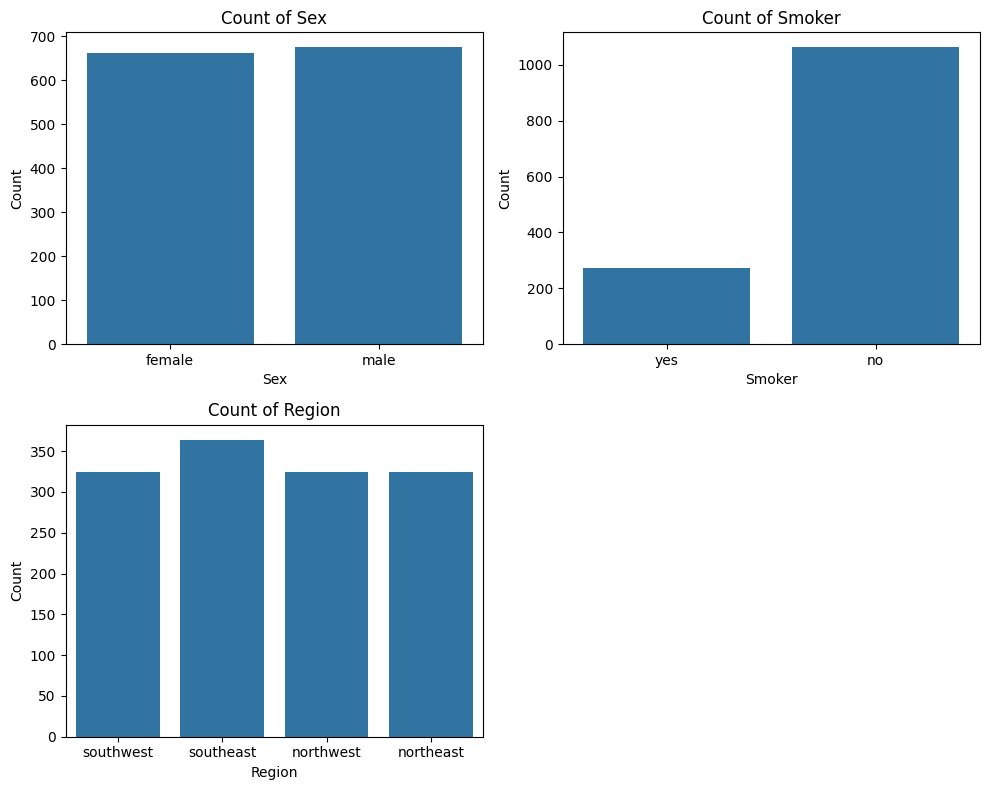

In [14]:
# Count plot for categorical features
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 8))
row_col = [(0, 0), (0, 1), (1, 0)]

for i, cat_col_name in enumerate(cat_col.columns):
    row, col = row_col[i]
    ax = axes[row, col]
    
    sns.countplot(data = df, x = cat_col_name, ax = ax)
    ax.set_title(f'Count of {cat_col_name.title()}')
    ax.set_xlabel(cat_col_name.title())
    ax.set_ylabel('Count')

fig.delaxes(axes[1, 1])
plt.tight_layout()
plt.show()

By plotting a count plots for the categorical features, we are able to visualize easily the distribution for each categorical feature.

Observation:
- The gender and region spread of policyholders in this data set is balanced.
- Majority of the policyholders are non-smokers, while only around 20% are smokers. This can be expected due to the increased awareness of health risks associated with smoking and a greater emphasis on healthy lifestyles over time.

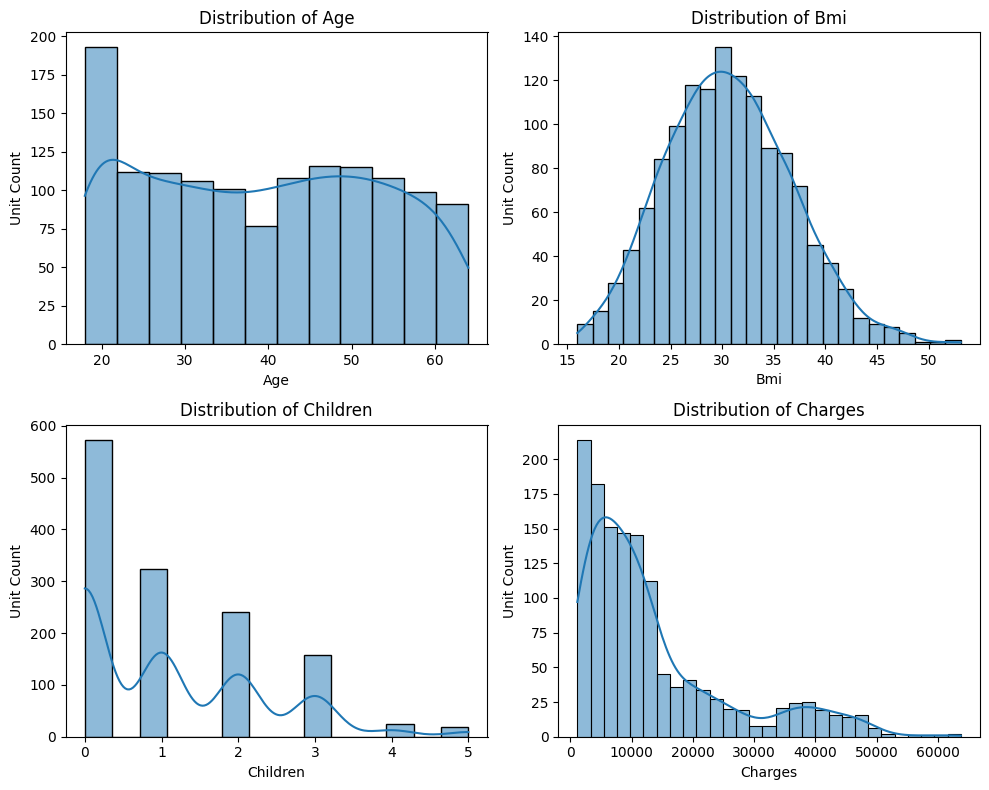

In [15]:
# Histogram for numerical features
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 8))
row_col = [(0, 0), (0, 1), (1, 0), (1, 1)]

for i, num_col_name in enumerate(num_col.columns):
    row, col = row_col[i]
    ax = axes[row, col]
    
    sns.histplot(data = df, x = num_col_name, kde = True, ax = ax)
    ax.set_title(f'Distribution of {num_col_name.title()}')
    ax.set_xlabel(num_col_name.title())
    ax.set_ylabel('Unit Count')

# fig.delaxes(axes[1, 1])
plt.tight_layout()
plt.show()

By plotting a histograms for the numerical features, we can visualize the distribution for each discrete and continuous feature.

Observation:
- The age of policyholders are mostly uniformly distributed with the exception of a **higher count for those in the early 20s.** This could be attributed to it being the age where we start working.
- The BMI of policyholders in this data set are normally distributed whereby the mean is 30.66 kg/m2.
- Since there is a higher count of policyholders in the early 20s, it is expected that 0 number of children/dependents will have the highest count.
- **Majority of medical charges claimed by policyholders are below \\$15,000.** However, there are still many that have high medical charge with some outliers in the tail end of the spectrum.

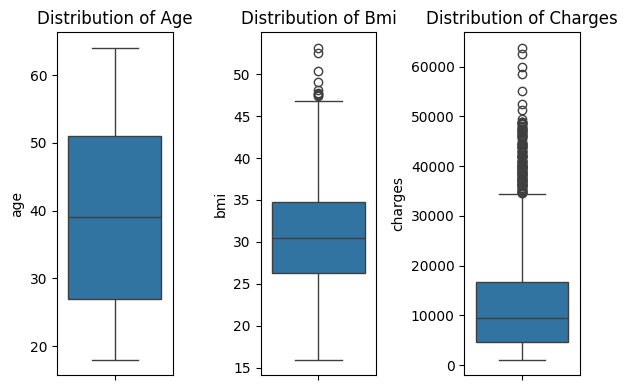

In [16]:
# Boxplot for statistical analysis of continuous features
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (6, 4))
row_col = [(0, 0), (0, 1), (0, 2)]

for i, num_col_name in enumerate(num_col.columns.drop('children')):
    # row, col = row_col[i]
    # ax = axes[row, col]
    ax = axes[i]
    
    sns.boxplot(data = df, y = num_col_name, ax = ax)
    ax.set_title(f'Distribution of {num_col_name.title()}')
    #ax.set_xlabel(num_col_name.title())
    #ax.set_ylabel('Unit Count')

# fig.delaxes(axes[1, 1])
plt.tight_layout()
plt.show()

By plotting a box plots for the numerical features, we can visualize the distribution of data in quartiles and find outliers.

Observation:
- The age feature is uniformly distributed with no outliers.
- The BMI feature has a few outliers above 47 kg/m2.
- The **medical charges feature has lots of outliers above \\$35,000** as the majority of policyholders have only \\$16,657 and below worth of medical costs billed by health insurance.

### <a id='Feature_Relationship_Analysis' href=#1> Feature Relationship Analysis </a>

Next, we will analyse the relationships between the different features in the data set.

In [17]:
print(f'Numerical Features: {num_col.columns.values}')
print(f'Categorical Features: {cat_col.columns.values}')

Numerical Features: ['age' 'bmi' 'children' 'charges']
Categorical Features: ['sex' 'smoker' 'region']


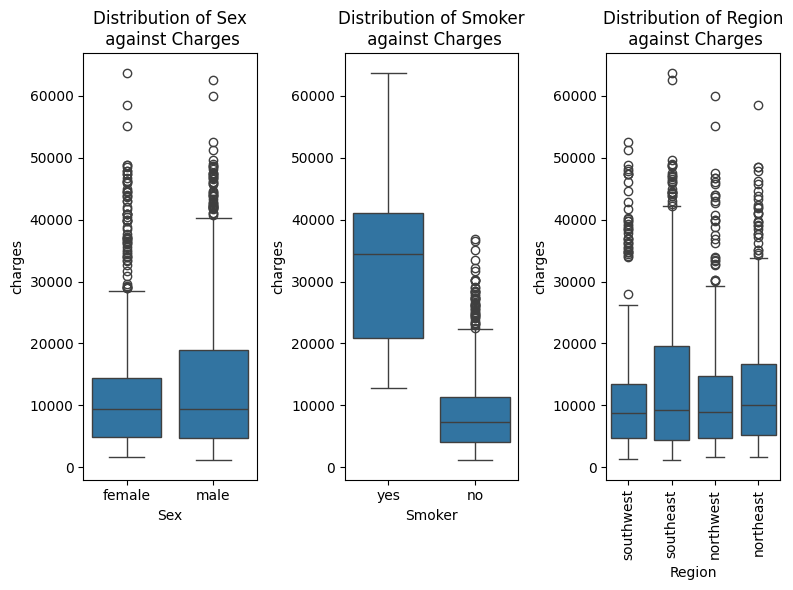

In [18]:
# Boxplot for relationship between categorical features against target
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (8, 6))
row_col = [(0, 0), (0, 1), (0, 2)]

for i, num_col_name in enumerate(cat_col.columns):
    # row, col = row_col[i]
    # ax = axes[row, col]
    ax = axes[i] # single row
    
    sns.boxplot(data = df, x = num_col_name, y = 'charges', ax = ax)
    ax.set_title(f'Distribution of {num_col_name.title()}\n against Charges')
    plt.xticks(rotation = 90)
    ax.set_xlabel(num_col_name.title())
    # ax.set_ylabel('Unit Count')

# fig.delaxes(axes[1, 1]) # delete empty axes
plt.tight_layout()
plt.show()

By plotting a box plots for the distribution of categorical features against the target 'charges', we can visualize the distribution of 'charges' in quartiles against the different categorical features.

Observation:
- The medical costs billed are fairly equal for each unique values in features 'sex' and 'region'.
- There seems to be a huge difference between medical costs billed by smokers and non-smokers whereby the **mean medical cost billed by smokers are around \\$27,500 higher compared to non-smokers.**

We will closely explore the relationship of smoker status of policyholders against charges for other features.

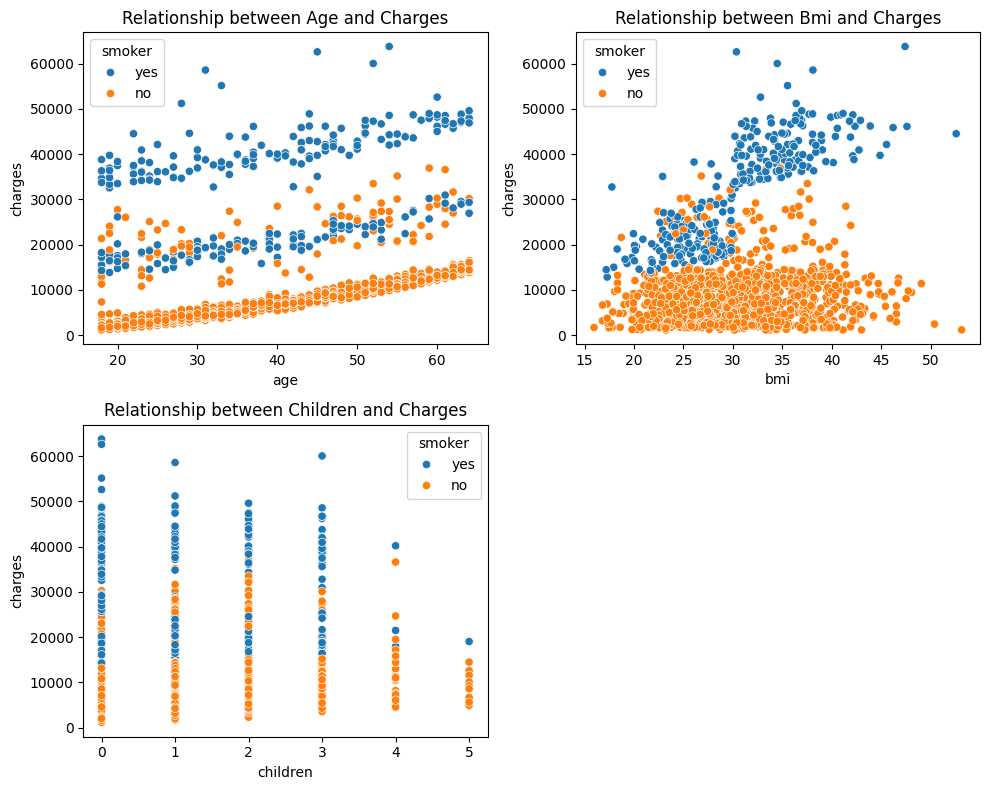

In [19]:
# Scatterplot for relationship between numerical features against target
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 8))
row_col = [(0, 0), (0, 1), (1, 0), (1, 1)]

for i, num_col_name in enumerate(num_col.columns.drop('charges')):
    row, col = row_col[i]
    ax = axes[row, col]
    
    sns.scatterplot(data = df, x = num_col_name, y = 'charges', hue = 'smoker', ax = ax)
    ax.set_title(f'Relationship between {num_col_name.title()} and Charges')
    # ax.set_xlabel(num_col_name.title())
    # ax.set_ylabel('Unit Count')

fig.delaxes(axes[1, 1])
plt.tight_layout()
plt.show()

By plotting a scatterplots for the numerical features, we can visualize the distribution for each discrete and continuous feature. In addition, we have also separated the data by 'smoker' feature due to its correlation to our target 'charges' previously.

Observation:
- It can be seen that the **individual medical cost increases as our age increase**, which is understandable as the risks of contracting certain disease or health complications increases as we age due to our weakening body.
- The medical costs billed by non-smokers across a range of BMI are distributed equally. **However for smokers, there seems to be a linear relationship between BMI and charges.**
- The individual medical cost are equal no matter the number of children or dependents.
- Across these 3 features, we can see that **policyholders that are smokers generally bill higher medical cost compared to non-smokers.**

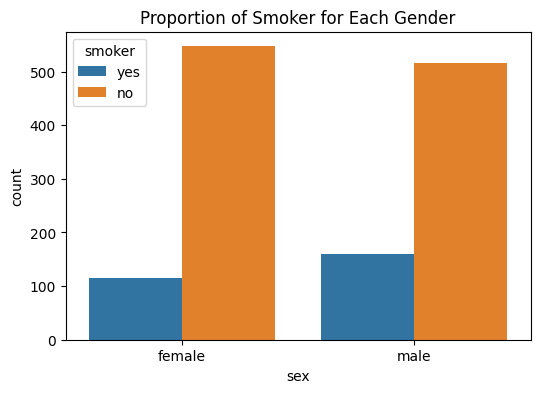

In [20]:
plt.figure(figsize = (6, 4))
sns.countplot(data = df, x = 'sex', hue = 'smoker')
plt.title('Proportion of Smoker for Each Gender');

From the count plot displaying the proportion of smoker for each gender, the proportion of males who are smoker is higher than that of females. However, the difference is not that significant.

Since we know that the medical cost increases as we age and smokers generally have higher medical costs, let's look at the relationship between age and charges separated by the remaining features for non-smokers and smokers.

In [21]:
# Get data where smoker is either yes or no
df_smoker_no = df[df['smoker'] == 'no']
df_smoker_yes = df[df['smoker'] == 'yes']

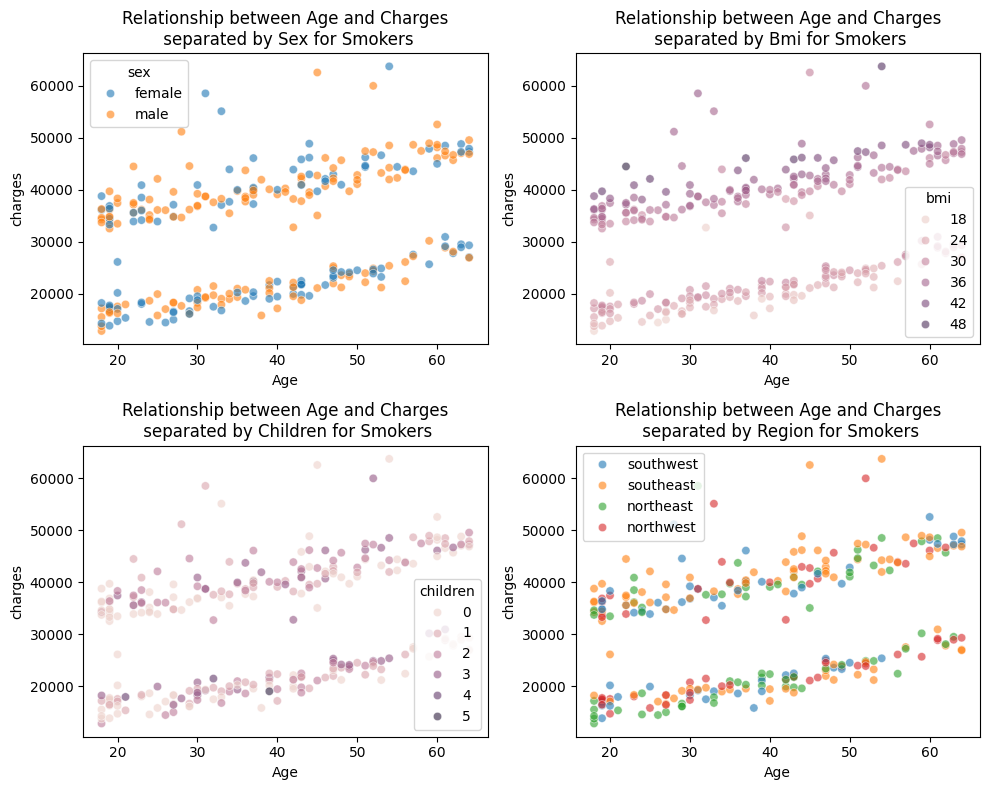

In [22]:
# Scatterplot for relationship between features against target
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 8))
row_col = [(0, 0), (0, 1), (1, 0), (1, 1)]
study = ['sex', 'bmi', 'children', 'region']

for i, num_col_name in enumerate(study):
    row, col = row_col[i]
    ax = axes[row, col]
    
    sns.scatterplot(data = df_smoker_yes, x = 'age', y = 'charges', hue = num_col_name, ax = ax, alpha = 0.6)
    ax.set_title(f'Relationship between Age and Charges\n separated by {num_col_name.title()} for Smokers')
    ax.set_xlabel('Age')
    # ax.set_ylabel('Unit Count')

# fig.delaxes(axes[1, 1])
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

Observation for Smokers:
- The medical costs are uniformly distributed for the different sex, number of children/rependents and regions.
- It can be confirmed that **an increase in BMI in addition to age for smokers will cause the medical costs to increase.**
- The outliers in charges are uniformly distributed. These cases may be due to certain policyholders requiring treatments for more serious complications.

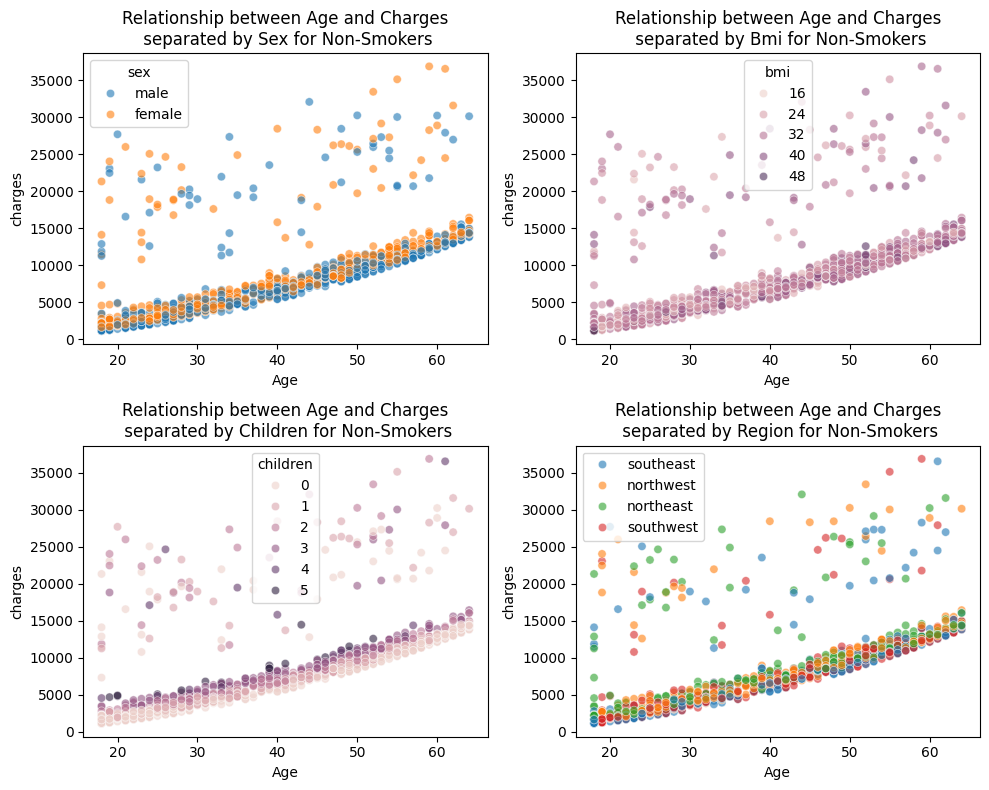

In [23]:
# Scatterplot for relationship between features against target
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 8))
row_col = [(0, 0), (0, 1), (1, 0), (1, 1)]
study = ['sex', 'bmi', 'children', 'region']

for i, num_col_name in enumerate(study):
    row, col = row_col[i]
    ax = axes[row, col]
    
    sns.scatterplot(data = df_smoker_no, x = 'age', y = 'charges', hue = num_col_name, ax = ax, alpha = 0.6)
    ax.set_title(f'Relationship between Age and Charges\n separated by {num_col_name.title()} for Non-Smokers')
    ax.set_xlabel('Age')
    # ax.set_ylabel('Unit Count')

# fig.delaxes(axes[1, 1])
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

Observation for Non-Smokers:
- The medical costs are uniformly distributed for the different sex, BMI and regions.
- Compared to smokers, BMI does not have an effect on an individuals medical costs.
- It can be seen that **as the number of children/dependents increase, there is generally a slightly higher medical cost billed.**
- The outliers in charges are uniformly distributed. These cases may be due to certain policyholders requiring treatments for more serious complications.

### <a id='Data_Correlation' href=#1> Data Correlation </a>

Now that we have completed EDA, we will look at the correlation between the features and target.

In [24]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


As mentioned previously, we will have to process the categorical object features into numerical features to view the correlation and train the prediction model.

In [25]:
# For low feature count: map features with 2 unique values to 0 and 1 and get dummy
# For huge feature count: drop first column of dummies
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()

# Categorical features of binary values to be mapped
cat_2 = ['sex', 'smoker']
df_dummy = df.copy()

for cat in cat_2:
    df_dummy[cat] = label_enc.fit_transform(df_dummy[cat])

# Get dummies for remaining categorical features
df_dummy = pd.get_dummies(df_dummy)
df_dummy.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False


In [26]:
# Feature correlation to target
df_corr = df_dummy.corr()['charges'].sort_values()[:-1]
pd.DataFrame(data = df_corr.values, index = df_corr.index, columns = ['Correlation to charges'])

,Correlation to charges
region_southwest,-0.043637
region_northwest,-0.038695
region_northeast,0.005945
sex,0.058044
children,0.067389
region_southeast,0.073578
bmi,0.198401
age,0.298308
smoker,0.787234


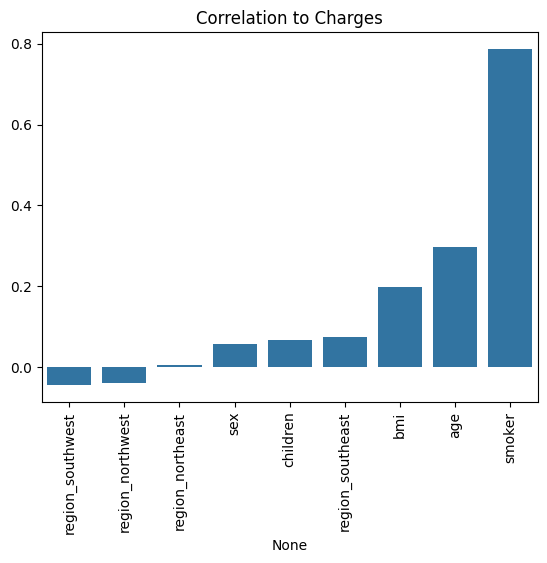

In [27]:
# Feature correlation to target
sns.barplot(x = df_corr.index, y = df_corr.values)
plt.title('Correlation to Charges')
plt.xticks(rotation = 90);

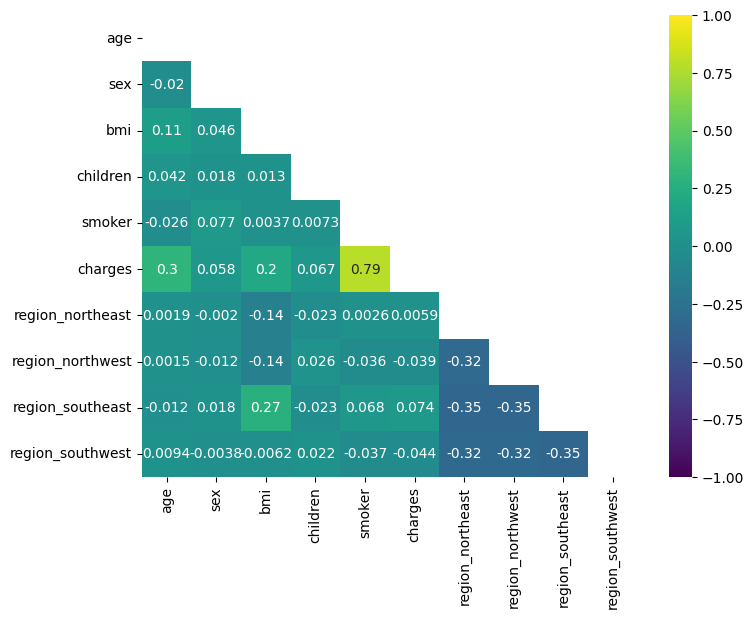

In [28]:
# Correlation between features
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(df_dummy.corr())

plt.figure(figsize = (8, 6))
sns.heatmap(data = df_dummy.corr(), annot = True, mask = matrix, cmap = 'viridis', vmin=-1, vmax=1);

Observation:
- As predicted during EDA, it can be seen that the **smoking status** of policyholders has the highest correlation of 0.79 to the charges.
- **Age** is the second feature correlated to charges, albeit the correlation being much lower compared to the smoking status with only 0.3 correlation.
- **BMI** has a correlation of 0.2 and is the third feature correlated to charges, however this is only true for smokers as identified during EDA.
- The rest of the features are quite insignificant to the charges.

## <a id='Data_Preparation' href=#1> Data Preparation </a>

Now that we have fully explored the data and its correlations, we can start preparing the data and define some functions for model development.

In [29]:
X = df_dummy.drop('charges', axis = 1)
y = df_dummy['charges']

In [30]:
# Train/validation/test split
from sklearn.model_selection import train_test_split

# Split train-test once if using GridSearchCV, else split train-validation-holdout test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [31]:
# Scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [32]:
# Function to evaluate model
# prediction = model.predict(scaled_X_test)
# To define as (model_name)_lst if used in conjunction with error_compare_regression function
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

def model_evaluation(prediction):
    mae = mean_absolute_error(y_test, prediction)
    mape = mean_absolute_percentage_error(y_test, prediction)
    rmse = np.sqrt(mean_squared_error(y_test, prediction))
    r2 = r2_score(y_test, prediction)
    
    print(f'MAE: {mae}\nMAPE: {mape}\nRMSE: {rmse}\nR^2: {r2}')
    
    return [mae, mape, rmse, r2]

In [33]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

def model_evaluation_mlflow(prediction):
    mae = mean_absolute_error(y_test, prediction)
    mape = mean_absolute_percentage_error(y_test, prediction)
    rmse = np.sqrt(mean_squared_error(y_test, prediction))
    r2 = r2_score(y_test, prediction)
    
    return mae, mape, rmse, r2

In [34]:
# Function to create comparison DF of MAE, MA%E, RMSE and R^2 for different models
# model_lst = list of model names ['lr', 'pr', 'grid_svr', 'grid_rfr']
# All (model_lst)_lst variables from 'model_evaluation' function must be defined
def error_compare_regression(model_lst):
    columns = ['MAE (lower better)', 'MAPE (lower better)', 'RMSE (lower better)', 'R^2 (closer to 1 better)']
    data_dict = {}
    
    for i in model_lst:
        data_dict[i+'_lst'] = globals()[i+'_lst']
    
    final_lst = [data_dict[i+'_lst'] for i in model_lst]
    return pd.DataFrame(data = final_lst, index = model_lst, columns = columns)

In [35]:
# Function to plot learning curve for regression model
# Arguments: (ML Algo, scaled X train data, y train data)
# model: to use model.best_estimator_ if performing GridSearchCV
def learning_curve_plot_reg(model, X, y):
    from sklearn.model_selection import learning_curve
    from sklearn.model_selection import ShuffleSplit
    from sklearn.metrics import mean_squared_error

    shuffle_split = ShuffleSplit(n_splits = 5, test_size = 0.3, random_state = 101)

    # Use learning_curve function
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv = shuffle_split, scoring = 'neg_mean_squared_error', 
        n_jobs = -1, train_sizes = np.linspace(.1, 1.0, 10))

    # Convert the negative mean squared error to positive
    train_scores = -train_scores
    test_scores = -test_scores
    
    # Calculate mean and standard deviation for training and test scores
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    
    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Mean Squared Error")
    
    # Plot training scores
    plt.plot(train_sizes, train_scores_mean, 'o-', color = "r", label = "Training Score")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha = 0.1, color = "r")
    
    # Plot cross-validation scores
    plt.plot(train_sizes, test_scores_mean, 'o-', color = "g", label = "Cross-validation Score")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha = 0.1, color = "g")
    
    plt.legend(loc = "best")
    plt.show()

## <a id='Model_Development' href=#1> Model Development </a>

We will develop the model using the processed data. Multiple machine learning algorithms will be used while tuning the hyperparameters to ensure the best model is developed.

### <a id='Linear_Regression_(lr)' href=#1> Linear Regression (lr) </a>

In [36]:
from sklearn.linear_model import LinearRegression

mlflow.sklearn.autolog(disable = True)

with mlflow.start_run(run_name = 'lr_1'):
    lr = LinearRegression()
    lr.fit(scaled_X_train, y_train)
    y_pred_lr = lr.predict(scaled_X_test)
    lr_lst = model_evaluation_mlflow(y_pred_lr)
    lr_mae, lr_mape, lr_rmse, lr_r2 = lr_lst
    
    mlflow.set_tag('model_name', 'lr_baseline')
    mlflow.log_metric('test_mae', lr_mae)
    mlflow.log_metric('test_mape', lr_mape)
    mlflow.log_metric('test_rmse', lr_rmse)
    mlflow.log_metric('test_r2', lr_r2)
    mlflow.sklearn.log_model(lr, 'sk_models')

### <a id='Support_Vector_Regression_with_GridSearch_(grid_svr)' href=#1> Support Vector Regression with GridSearch (grid_svr) </a>

In [40]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

mlflow.sklearn.autolog(disable = True)

with mlflow.start_run(run_name = 'svr_3'):
    C = [600, 1000, 5000, 10000]
    kernel = ['linear', 'rbf', 'poly', 'sigmoid']
    gamma = ['scale', 'auto']
    degree = [2, 3, 4]
    epsilon = [0.01, 0.1, 1, 2]
    param_grid_svr = {'C': C, 'kernel': kernel, 'gamma': gamma, 'degree': degree, 'epsilon': epsilon}

    svr = SVR()
    grid_svr = GridSearchCV(svr, param_grid_svr)
    grid_svr.fit(scaled_X_train, y_train)
    
    y_pred_grid_svr = grid_svr.predict(scaled_X_test)
    grid_svr_lst = model_evaluation_mlflow(y_pred_grid_svr)
    svr_mae, svr_mape, svr_rmse, svr_r2 = grid_svr_lst
    
    mlflow.set_tag('model_name', 'svr_baseline')
    mlflow.log_params(grid_svr.best_params_)
    mlflow.log_metric('test_mae', svr_mae)
    mlflow.log_metric('test_mape', svr_mape)
    mlflow.log_metric('test_rmse', svr_rmse)
    mlflow.log_metric('test_r2', svr_r2)
    mlflow.sklearn.log_model(grid_svr.best_estimator_, 'sk_models')

svr_1 results:

Although grid search and cross validation is performed on to obtain the optimal hyperparameters, the mean absolute percentage error (MAPE) is still very high at 82.6% while the R-squared value (R^2) is extremely low at 0.07. This could be due to the model underfitting. Let's increase the C value and tune the other hyperparameters and compare the results.

svr_2 results:

svr_2:


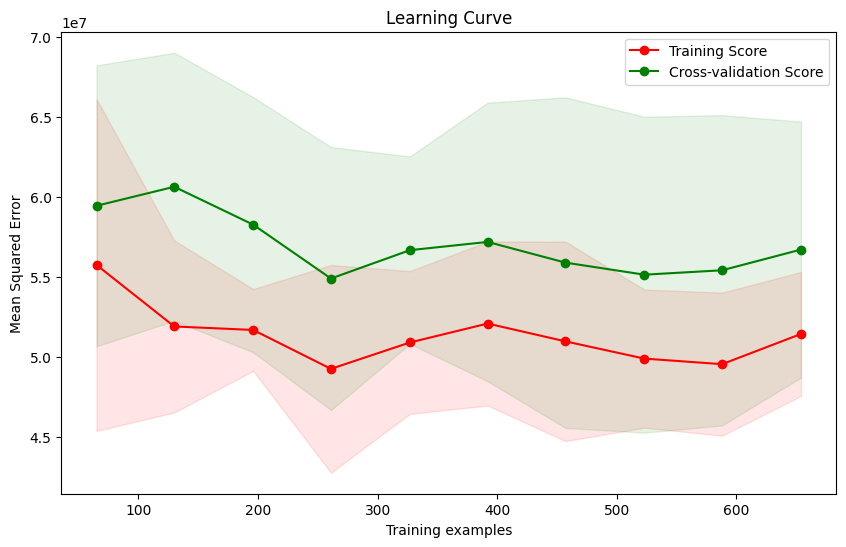

In [39]:
# Plot learning curve
print('svr_2:')
learning_curve_plot_reg(grid_svr.best_estimator_, scaled_X_train, y_train)

By increasing the C value while maintaining the other hyperparameters, the MAPE on the test set has decreased to 18.6% while R^2 has increased to 0.73. Although we shouldn't tune the hyperparameters based on the test set evaluation results, however this can be an exception as the error rate is exceptionally high before secondary tuning.

From the learning curve of training MSE and cross-validation MSE against number of training samples, the training score and cross-validation score are not converging as expected, this means that the model is still underfitting. We'll tune the hyperparameters further.

svr_3 results:

svr_3:


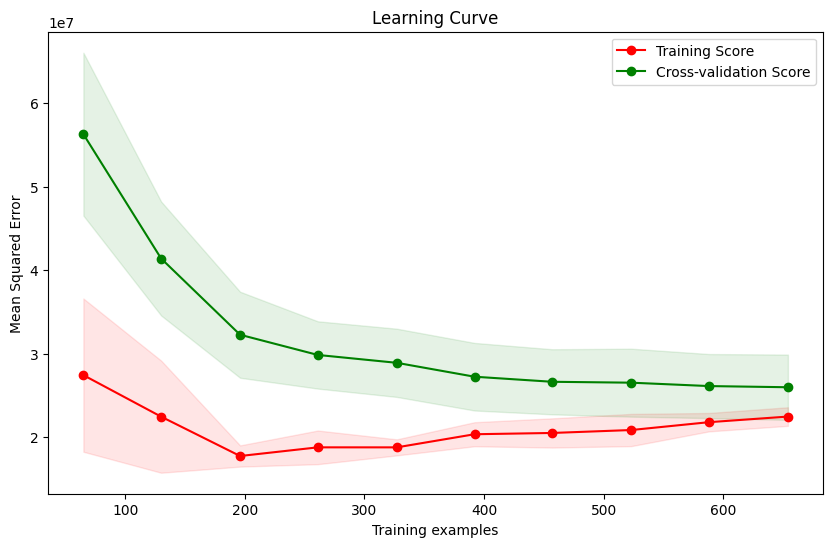

In [41]:
# Plot learning curve
print('svr_3:')
learning_curve_plot_reg(grid_svr.best_estimator_, scaled_X_train, y_train)

The training curve and cross-validation curve is converging to a common point shows a good fit model which can generalize to unseen data. As further tuning has minimal improvements on the error and R^2 values, we will accept this predictive model. Furthermore, as the training and cross-validation curves has almost fully converged with the cross-validation curve almost plateauing, adding new training data would not further improve the model. The error value for this model is close to other algorithms, hence the remainder error could be irreducible error.

### <a id='Random_Forest_Regression_with_GridSearch_(grid_rfr)' href=#1> Random Forest Regression with GridSearch (grid_rfr) </a>

In [42]:
from sklearn.ensemble import RandomForestRegressor

mlflow.sklearn.autolog(disable = True)

with mlflow.start_run(run_name = 'rfr_1'):
    n_estimators = [64, 100, 128, 200]
    max_depth = [None, 10, 20, 30, 40, 50]
    min_samples_split = [2, 5, 10, 20]
    min_samples_leaf = [1, 2, 4, 8]
    max_features = ["sqrt", "log2", None]
    bootstrap = [True, False]
    oob_score = [True, False]
    param_grid_rfr = {'n_estimators': n_estimators, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'max_features': max_features, 'bootstrap': bootstrap, 'oob_score': oob_score}

    rfr = RandomForestRegressor()
    grid_rfr = GridSearchCV(rfr, param_grid_rfr)
    grid_rfr.fit(scaled_X_train, y_train)
    
    y_pred_grid_rfr = grid_rfr.predict(scaled_X_test)
    grid_rfr_lst = model_evaluation_mlflow(y_pred_grid_rfr)
    rfr_mae, rfr_mape, rfr_rmse, rfr_r2 = grid_rfr_lst
        
    mlflow.set_tag('model_name', 'rfr_baseline')
    mlflow.log_params(grid_rfr.best_params_)
    mlflow.log_metric('test_mae', rfr_mae)
    mlflow.log_metric('test_mape', rfr_mape)
    mlflow.log_metric('test_rmse', rfr_rmse)
    mlflow.log_metric('test_r2', rfr_r2)
    mlflow.sklearn.log_model(grid_rfr.best_estimator_, 'sk_models')

rfr_1 results:

rfr_1:


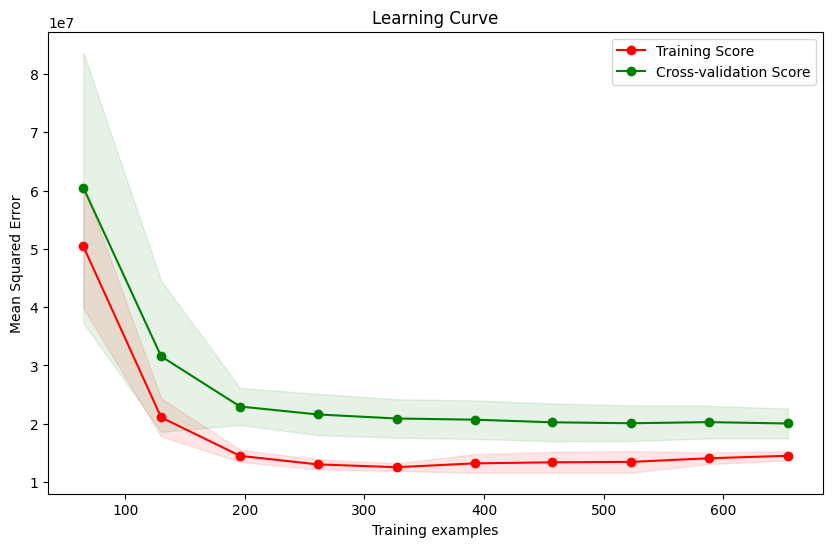

In [43]:
# Plot learning curve
print('rfr_1:')
learning_curve_plot_reg(grid_rfr.best_estimator_, scaled_X_train, y_train)

### <a id='Extreme_Gradient_Boost_with_GridSearch_(grid_xgb)' href=#1> Extreme Gradient Boost with GridSearch (grid_xgb) </a>

In [46]:
from xgboost import XGBRegressor

mlflow.sklearn.autolog(disable = True)

with mlflow.start_run(run_name = 'xgb_1'):
    learning_rate = [0.01, 0.1, 0.2]
    n_estimators = [50, 100, 200]
    max_depth = [3, 5, 7]
    min_child_weight = [1, 3, 5]
    subsample = [0.8, 0.9, 1.0]
    colsample_bytree = [0.8, 0.9, 1.0]
    param_grid_xgb = {'learning_rate': learning_rate, 'n_estimators': n_estimators, 'max_depth': max_depth, 'min_child_weight': min_child_weight, 'subsample': subsample, 'colsample_bytree': colsample_bytree}

    xgb = XGBRegressor()
    grid_xgb = GridSearchCV(xgb, param_grid_xgb)
    grid_xgb.fit(scaled_X_train, y_train)
    
    y_pred_grid_xgb = grid_xgb.predict(scaled_X_test)
    grid_xgb_lst = model_evaluation_mlflow(y_pred_grid_xgb)
    xgb_mae, xgb_mape, xgb_rmse, xgb_r2 = grid_xgb_lst
            
    mlflow.set_tag('model_name', 'xgb_baseline')
    mlflow.log_params(grid_xgb.best_params_)
    mlflow.log_metric('test_mae', xgb_mae)
    mlflow.log_metric('test_mape', xgb_mape)
    mlflow.log_metric('test_rmse', xgb_rmse)
    mlflow.log_metric('test_r2', xgb_r2)
    mlflow.xgboost.log_model(grid_xgb.best_estimator_, 'xgb_model')

xgb_1 results:

xgb_1:


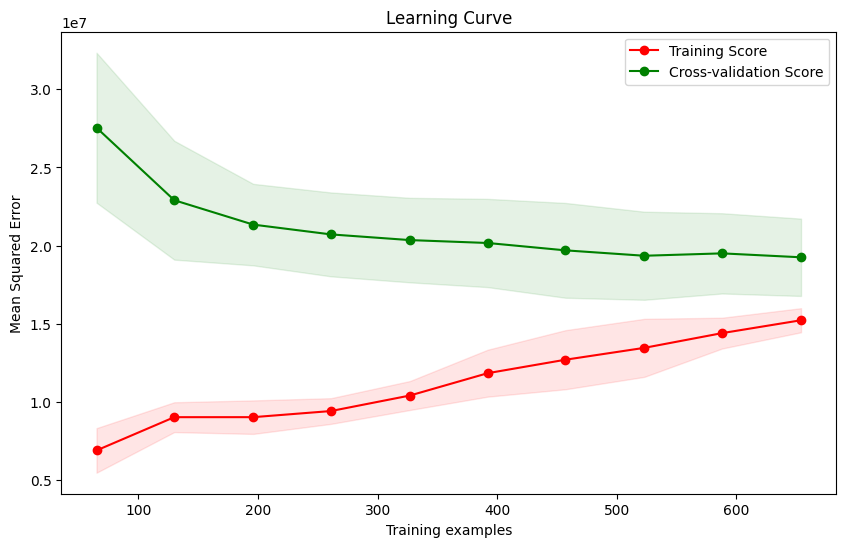

In [47]:
# Plot learning curve
print('xgb_1:')
learning_curve_plot_reg(grid_xgb.best_estimator_, scaled_X_train, y_train)

Could possibly further reduce error by increasing training data, however the difference would be minimal as the training and cross-validation curve are almost converging.

## <a id='Model_Comparison' href=#1> Model Comparison </a>

Comparison of error and R^2 scores for different algorithms:
![](Data/mlflow_ui_graph.PNG)

Observation:
1. grid_xgb ranks 1st in RMSE and R^2, but ranks 3rd for MAE and MAPE. Meaning this is the most robust model where its predictions are very close to the true value and relates the features to the target the best.
2. grid_svr has the lowest MAE and MAPE, however it ranks second last in terms of RMSE and R^2. This shows that the model is less robust and susceptible to outliers in the data. The features in the model also explains less of the variance in the targets.
3. grid_rfr ranks 2nd for all categories.
4. pr performed second worst. However, the difference between the polynomial regression errors and R^2 scores are not that far off from the mean of all algorithms.
5. lr is dead last in all categories. The linear regression model is too simple to fit the data as most features are not exactly in linear relationship with the target and there are many outliers.
6. Overall, the performance of all models are quite similar aside from the linear regression model. The selection of best model would depend on what characteristics are more important in the prediction of medical cost.

## <a id='Conclusion' href=#1> Conclusion </a>

Based on the results of this project, we can conclude that:
1. Through EDA, we have identified that the **smoking status of an individual plays a huge role in dictating the medical cost** that will be incurred. The age, BMI and number of children/dependents also affects the medical cost, albeit slightly lesser.
2. There are **more policyholders which are in their early 20s**, which could be due to the fact that they will have no more coverage from their parents insurance plans anymore at this age range. Besides that, it is also the age whereby young adults enter the workforce which gives them access to employer-sponsored insurance plans.
3. The **best model is the Extreme Gradient Boost (grid_xgb) model** as it is the most robust model. It has a **MAE of 2542, MAPE of 31%, RMSE of 4678 and R^2 of 0.84**. Although the MAE and MAPE is not the lowest compared with other models, however all the predictions won't deviate too much from the true value, meaning there won't be major errors in predicting the medical costs.

## <a id='Recommendation' href=#1> Recommendation </a>

From the conclusions made, I will recommend that:
1. Insurance companies should initially **determine the policy premium of an individual based on whether they are smokers or not** as based on the data, smokers generally have significantly higher medical costs compared to the latter.
2. The following indicators would be the **age, BMI and number of children/dependents.** As the age of policyholder increase, the health risks increases too. If the policyholder is a smoker, an increase in BMI would cause higher health risks while there would be no difference for non-smokers. For non-smokers, the number of children/dependents will also cause a higher medical cost billed. By taking note of these factors affecting the medical cost, insurance companies can ensure they make a profit, while providing policyholders with fair policies.
3. The **duration for health insurance policies** should not be too long or the coverage should vary each year as the medical cost increases linearly to an individuals age.
4. Insurance companies should **target individuals in the early 20s** as this is the age range where we are most interested in buying into a health insurance plan. As insurance plans typically last for years, insurance companies are able to turn these young adults into loyal customers early. Furthermore, most individuals are highly likely to continue their health plans within the same company if the policy is favourable. Hence, it is crucial for companies to have product portfolios targetted to young adults which are first time insurance buyers.

## <a id='Final_Model_Deployment' href=#1> Final Model Deployment </a>

Create the final model with the best hyperparameters and fit the model with whole dataset.

In [ ]:
import mlflow

# Load and fit best model:
artifact_path = 'runs:/09c20b5967254408b7719ef1fc81c9ca/xgb_model'
final_model_xgb = mlflow.sklearn.load_model(artifact_path)
scaled_X = scaler.transform(X)
final_model_xgb.fit(scaled_X, y)

# Create a pipeline which fitted scaler and model:
from sklearn.pipeline import Pipeline
final_pipeline = Pipeline([('scaler', scaler), ('model', final_model_xgb)])

# Save model:
import joblib
joblib.dump(final_pipeline, 'medical_cost_model_pipeline.pkl')
joblib.dump(list(X.columns), 'medical_cost_col_names.pkl')
joblib.dump(list(df_ori.columns[:-1]), 'medical_cost_ori_X_col_names.pkl')

# To load model:
# import joblib
# loaded_model = joblib.load('medical_cost_model_pipeline.pkl')
# dummy_columns = joblib.load('medical_cost_col_names.pkl')
# ori_columns = joblib.load('medical_cost_ori_X_col_names.pkl')

# To use model:
# import pandas as pd
# # For 1 list, new_list_data = [['values']]:
# new_list_data = [[]]
# new_data = pd.get_dummies(pd.DataFrame(new_list_data, columns = ori_columns).replace({'sex': {'female': 0, 'male': 1}, 'smoker': {'no': 0, 'yes': 1}})).reindex(columns = dummy_columns, fill_value = 0)
# loaded_model.predict(new_data)
# # # # # # # # # # # # # # # # # # # # # # 
# # For new df, df_new = pd read file:
# df_new = pd.read_excel('example.xlsx').replace({'sex': {'female': 0, 'male': 1}, 'smoker': {'no': 0, 'yes': 1}})
# new_data = pd.get_dummies(df_new).reindex(columns = dummy_columns, fill_value = 0)
# loaded_model.predict(new_data)

## <a id='Neural_Network_Approach' href=#1> Neural Network Approach </a>

The neural network approach to this dataset can be found [**HERE**](https://github.com/xiyap/Insurance_Charges_NN/blob/main/Insurance%20Charges%20Prediction%20-%20Neural%20Network.ipynb). 